<div align="center">

# **Modelo de Frecuencia**

</div>

## Librerias

In [77]:
source("../src/utils/Estimadores_frecuencia.R")
source("../src/utils/test_independencia.R")

In [78]:
library(readxl)
library(ggplot2)
library(dplyr)
library(gridExtra)

## Data

### Data Historica

In [79]:
siniestros_ppd <- read.csv("../data/processed/siniestros_ppd_mes.csv")
siniestros_pph <- read.csv("../data/processed/siniestros_pph_mes.csv")
siniestros_pth <- read.csv("../data/processed/siniestros_pth_mes.csv")
siniestros_rc <- read.csv("../data/processed/siniestros_rc_mes.csv")
polizas_ppd <- read.csv("../data/processed/polizas_ppd_mes.csv")
polizas_pph <- read.csv("../data/processed/polizas_pph_mes.csv")
polizas_pth <- read.csv("../data/processed/polizas_pth_mes.csv")
polizas_rc <- read.csv("../data/processed/polizas_rc_mes.csv")

In [80]:
siniestros_pph$X <- NULL
siniestros_pth$X <- NULL
siniestros_ppd$X <- NULL
siniestros_rc$X <- NULL

In [81]:
polizas_pph$X <- NULL
polizas_pth$X <- NULL
polizas_ppd$X <- NULL
polizas_rc$X <- NULL

In [82]:
colnames(polizas_ppd)

[1] "Mes"            "Numero_polizas"

In [83]:
colnames(siniestros_ppd)

[1] "mes"        "severidad"  "siniestros"

### Nuevas polizas

In [84]:
vigentes_ppd <- read.csv("../data/processed/vigentes_ppd_mes.csv")
vigentes_pph <- read.csv("../data/processed/vigentes_pph_mes.csv")
vigentes_pth <- read.csv("../data/processed/vigentes_pth_mes.csv")
vigentes_rc <- read.csv("../data/processed/vigentes_rc_mes.csv")

## Merge de las tablas por mes

In [85]:
ppd <- merge(polizas_ppd, siniestros_ppd, by.x = "Mes", by.y = "mes")
pph <- merge(polizas_pph, siniestros_pph, by.x = "Mes", by.y = "mes")
pth <- merge(polizas_pth, siniestros_pth, by.x = "Mes", by.y = "mes")
rc <- merge(polizas_rc, siniestros_rc, by.x = "Mes", by.y = "mes")

In [86]:
colnames(ppd)
head(ppd)

[1] "Mes"            "Numero_polizas" "severidad"      "siniestros"

,Mes,Numero_polizas,severidad,siniestros
,<int>,<int>,<dbl>,<int>
1,1,123731,5655050524,1335
2,2,125121,4492536847,1141
3,3,128410,5471179256,1216
4,4,129515,6004526331,1320
5,5,130411,5402695646,1185
6,6,132402,5333035136,1212


In [87]:
# Calcular tasa de siniestros por mes
ppd$tasa <- ppd$siniestros / ppd$Numero_polizas
pph$tasa <- pph$siniestros / pph$Numero_polizas
pth$tasa <- pth$siniestros / pth$Numero_polizas
rc$tasa <- rc$siniestros / rc$Numero_polizas

In [88]:
ppd$X <- NULL
pph$X <- NULL
pth$X <- NULL
rc$X <- NULL

In [89]:
names(ppd)

[1] "Mes"            "Numero_polizas" "severidad"      "siniestros"    
[5] "tasa"

## Test de independencia

In [90]:
conteo <- ppd[,c("Mes","siniestros")] %>%
    rename(siniestros_ppd = siniestros) %>%
    full_join(pph[,c("Mes","siniestros")] %>% rename(siniestros_pph = siniestros), by = "Mes") %>%
    full_join(pth[,c("Mes","siniestros")] %>% rename(siniestros_pth = siniestros), by = "Mes") %>%
    full_join(rc[,c("Mes","siniestros")] %>% rename(siniestros_rc = siniestros), by = "Mes")
    
conteo$Mes <- NULL

In [91]:
test_independencia(conteo)

Warning message in cor.test.default(data[, i], data[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "kendall"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "kendall"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(data[, i], data[, j], method = "kendall"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default


               TESTS DE INDEPENDENCIA PARA VARIABLES DE CONTEO
Nivel de significancia: 0.05 
Variables analizadas: siniestros_ppd, siniestros_pph, siniestros_pth, siniestros_rc 
Número de observaciones: 12 
-------------------------------------------------------------------------------- 


                             Test                                          Estadistico    p_valor     Conclusion   
---------------------------  -------------------------------------------  ------------  ---------  ----------------
rho                          Spearman: siniestros_ppd vs siniestros_pph        -0.0351   0.913792   Independientes 
rho1                         Spearman: siniestros_ppd vs siniestros_pth         0.2872   0.365374   Independientes 
rho2                         Spearman: siniestros_ppd vs siniestros_rc         -0.1399   0.667151   Independientes 
rho3                         Spearman: siniestros_pph vs siniestros_pth        -0.2777   0.382201   Independientes 
rho4        

In [92]:
severidad <- ppd[,c("Mes","severidad")] %>%
    rename(severidad_ppd = severidad) %>%
    full_join(pph[,c("Mes","severidad")] %>% rename(severidad_pph = severidad), by = "Mes") %>%
    full_join(pth[,c("Mes","severidad")] %>% rename(severidad_pth = severidad), by = "Mes") %>%
    full_join(rc[,c("Mes","severidad")] %>% rename(severidad_rc = severidad), by = "Mes")
    
severidad$Mes <- NULL

In [93]:
test_independencia_severidad(severidad)


               TESTS DE INDEPENDENCIA PARA VARIABLES DE SEVERIDAD
Nivel de significancia: 0.05 
Variables analizadas: severidad_ppd, severidad_pph, severidad_pth, severidad_rc 
Número de observaciones: 12 
-------------------------------------------------------------------------------- 


                             Test                                                  Estadistico    p_valor          Conclusion         
---------------------------  ---------------------------------------------------  ------------  ---------  ---------------------------
cor                          Pearson: severidad_ppd vs severidad_pph                   -0.0284   0.930212        Independientes       
cor1                         Pearson: severidad_ppd vs severidad_pth                    0.1339   0.678164        Independientes       
cor2                         Pearson: severidad_ppd vs severidad_rc                     0.1333   0.679514        Independientes       
cor3                         Pears

## Estimando las distribuciones de frecuencia $N^{(c)}$

### $N^{(ppd)}$

In [94]:
resultado_ppd <- Estimadores_frecuencia(ppd$siniestros)
sobredispersion_ppd <- resultado_ppd$estadisticas_descriptivas$indice_sobredispersion

Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”


═══════════════════════════════════════════════════════════════════════════
                           ESTIMADORES DE FRECUENCIA                        
═══════════════════════════════════════════════════════════════════════════
N = 12 | Media = 1255.3333 | Varianza = 4420.7879 | Índice Sobredispersión = 3.5216
───────────────────────────────────────────────────────────────────────────

1. AJUSTE DE DISTRIBUCIONES:
───────────────────────────────────────────────────────────────────────────
Poisson:           λ = 1255.3333 | AIC = 148.49 | LogLik = -73.24
Binomial Negativa: size = 497.8318, μ = 1255.3333 | AIC = 137.81 | LogLik = -66.91

2. PRUEBAS DE BONDAD DE AJUSTE:
───────────────────────────────────────────────────────────────────────────
Poisson:           χ² = 0.0000 | p-valor = 1.0000 | Buen ajuste
Binomial Negativa: χ² = 0.0000 | p-valor = 1.0000 | Buen ajuste

3. PRUEBAS DE SOBREDISPERSIÓN:
───────────────────────────────────────────────────────────────────────────
Cameron-Tri

### $N^{(pph)}$

In [95]:
resultado_pph <- Estimadores_frecuencia(pph$siniestros)
sobredispersion_pph <- resultado_pph$estadisticas_descriptivas$indice_sobredispersion
cat("Índice de sobredispersión PPH:", sobredispersion_pph)

Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”


═══════════════════════════════════════════════════════════════════════════
                           ESTIMADORES DE FRECUENCIA                        
═══════════════════════════════════════════════════════════════════════════
N = 12 | Media = 52.7500 | Varianza = 52.5682 | Índice Sobredispersión = 0.9966
───────────────────────────────────────────────────────────────────────────

1. AJUSTE DE DISTRIBUCIONES:
───────────────────────────────────────────────────────────────────────────
Poisson:           λ = 52.7500 | AIC = 82.57 | LogLik = -40.28
Binomial Negativa: size = 299.5904, μ = 52.7500 | AIC = 84.87 | LogLik = -40.44

2. PRUEBAS DE BONDAD DE AJUSTE:
───────────────────────────────────────────────────────────────────────────
Poisson:           χ² = 1.3333 | p-valor = 0.9982 | Buen ajuste
Binomial Negativa: χ² = 1.3333 | p-valor = 0.9982 | Buen ajuste

3. PRUEBAS DE SOBREDISPERSIÓN:
───────────────────────────────────────────────────────────────────────────
Cameron-Trivedi:   z 

### $N^{(pth)}$

In [96]:
resultado_pth <- Estimadores_frecuencia(pth$siniestros)
sobredispersion_pth <- resultado_pth$estadisticas_descriptivas$indice_sobredispersion
cat("Índice de sobredispersión PTH:", sobredispersion_pth)

Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”


═══════════════════════════════════════════════════════════════════════════
                           ESTIMADORES DE FRECUENCIA                        
═══════════════════════════════════════════════════════════════════════════
N = 12 | Media = 48.0000 | Varianza = 88.1818 | Índice Sobredispersión = 1.8371
───────────────────────────────────────────────────────────────────────────

1. AJUSTE DE DISTRIBUCIONES:
───────────────────────────────────────────────────────────────────────────
Poisson:           λ = 48.0000 | AIC = 90.47 | LogLik = -44.23
Binomial Negativa: size = 70.5587, μ = 48.0000 | AIC = 90.53 | LogLik = -43.26

2. PRUEBAS DE BONDAD DE AJUSTE:
───────────────────────────────────────────────────────────────────────────
Poisson:           χ² = 0.8333 | p-valor = 0.9999 | Buen ajuste
Binomial Negativa: χ² = 0.8333 | p-valor = 0.9999 | Buen ajuste

3. PRUEBAS DE SOBREDISPERSIÓN:
───────────────────────────────────────────────────────────────────────────
Cameron-Trivedi:   z =

### $N^{(rc)}$

In [97]:
resultado_rc <- Estimadores_frecuencia(rc$siniestros)
sobredispersion_rc <- resultado_rc$estadisticas_descriptivas$indice_sobredispersion

Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(freq_obs, p = freq_esp/sum(freq_esp)):
“Chi-squared approximation may be incorrect”


═══════════════════════════════════════════════════════════════════════════
                           ESTIMADORES DE FRECUENCIA                        
═══════════════════════════════════════════════════════════════════════════
N = 12 | Media = 271.5833 | Varianza = 623.7197 | Índice Sobredispersión = 2.2966
───────────────────────────────────────────────────────────────────────────

1. AJUSTE DE DISTRIBUCIONES:
───────────────────────────────────────────────────────────────────────────
Poisson:           λ = 271.5833 | AIC = 116.11 | LogLik = -57.06
Binomial Negativa: size = 253.8759, μ = 271.5833 | AIC = 113.90 | LogLik = -54.95

2. PRUEBAS DE BONDAD DE AJUSTE:
───────────────────────────────────────────────────────────────────────────
Poisson:           χ² = 0.0000 | p-valor = 1.0000 | Buen ajuste
Binomial Negativa: χ² = 0.0000 | p-valor = 1.0000 | Buen ajuste

3. PRUEBAS DE SOBREDISPERSIÓN:
───────────────────────────────────────────────────────────────────────────
Cameron-Trivedi

## Estimando los $\lambda_c$

### $\lambda_{ppd}$

In [98]:
l_ppd <- mean(ppd$tasa)

In [99]:
l_ppd

[1] 0.009407576

### $\lambda_{pph}$

In [102]:
l_pph <- mean(pph$tasa)
l_pph

[1] 0.0003963103

### $\lambda_{pth}$

In [103]:
l_pth <- mean(pth$tasa)
l_pth

[1] 0.0003581772

### $\lambda_{rc}$

In [104]:
l_rc <- mean(rc$tasa)
l_rc

[1] 0.002400673

## Distribuciones de conteo para nuevas pólizas $N^{(c)}$

### $N^{(ppd)}$ - Binomial Negativa

In [105]:
# Cálculos para PPD (Binomial Negativa)
# Parámetros históricos del ajuste
size_hist_ppd <- resultado_ppd$ajustes$binomial_negativa$parametros$size
mu_hist_ppd <- resultado_ppd$ajustes$binomial_negativa$parametros$mu

# Para nuevas pólizas
mu_nuevas_ppd <- l_ppd * mean(vigentes_ppd$polizas_activas)
size_nuevas_ppd <- size_hist_ppd  # El parámetro size se mantiene

# Parámetro de probabilidad para referencia
prob_ppd <- size_nuevas_ppd / (size_nuevas_ppd + mu_nuevas_ppd)

cat("Parámetros históricos - size:", size_hist_ppd, ", mu:", mu_hist_ppd, "\n")
cat("Parámetros nuevas pólizas - size:", size_nuevas_ppd, ", mu:", mu_nuevas_ppd, "\n")
cat("Probability parameter (p):", prob_ppd, "\n")

Parámetros históricos - size: 497.8318 , mu: 1255.333 
Parámetros nuevas pólizas - size: 497.8318 , mu: 2.718789 
Probability parameter (p): 0.9945684 


### Visualización PPD - Ajuste Histórico vs Nuevas Pólizas

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


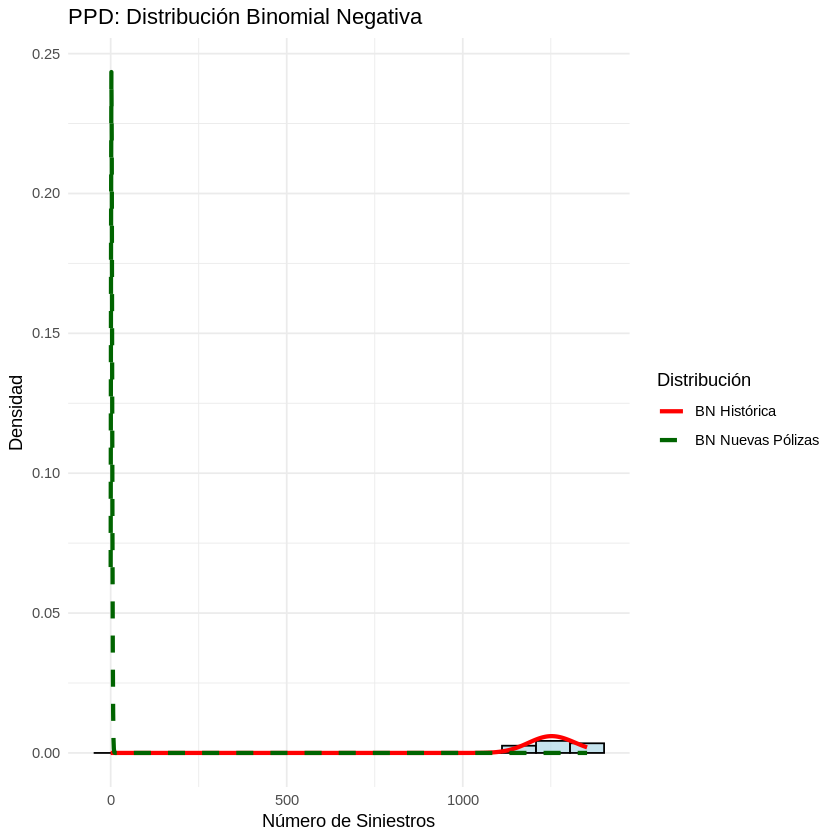

In [106]:
# Gráfico PPD - Solo Binomial Negativa (distribución recomendada)
max_val <- max(ppd$siniestros)
x_vals <- 0:max_val

# Distribuciones Binomial Negativa (histórica y nuevas pólizas)
nbinom_hist <- dnbinom(x_vals, size = size_hist_ppd, mu = mu_hist_ppd)
nbinom_nuevas <- dnbinom(x_vals, size = size_nuevas_ppd, mu = mu_nuevas_ppd)

# Preparar datos para ggplot
df_hist <- data.frame(
  x = x_vals,
  BN_Historica = nbinom_hist,
  BN_Nuevas = nbinom_nuevas
)

# Gráfico
p_ppd <- ggplot() +
  geom_histogram(data = data.frame(siniestros = ppd$siniestros), 
                 aes(x = siniestros, y = ..density..), 
                 bins = 15, alpha = 0.7, fill = "lightblue", color = "black") +
  geom_line(data = df_hist, aes(x = x, y = BN_Historica, color = "BN Histórica"), size = 1.2) +
  geom_line(data = df_hist, aes(x = x, y = BN_Nuevas, color = "BN Nuevas Pólizas"), size = 1.2, linetype = "dashed") +
  scale_color_manual(values = c("BN Histórica" = "red", "BN Nuevas Pólizas" = "darkgreen")) +
  labs(title = "PPD: Distribución Binomial Negativa", 
       x = "Número de Siniestros", y = "Densidad", color = "Distribución") +
  theme_minimal()

print(p_ppd)

### $N^{(pph)}$ - Poisson

In [107]:
# Cálculos para PPH (Poisson)
mu_nuevas_pph <- l_pph * mean(vigentes_pph$polizas_activas)

cat("Parámetro lambda para nuevas pólizas PPH:", mu_nuevas_pph, "\n")

Parámetro lambda para nuevas pólizas PPH: 0.1145337 


### Visualización PPH - Ajuste Histórico vs Nuevas Pólizas

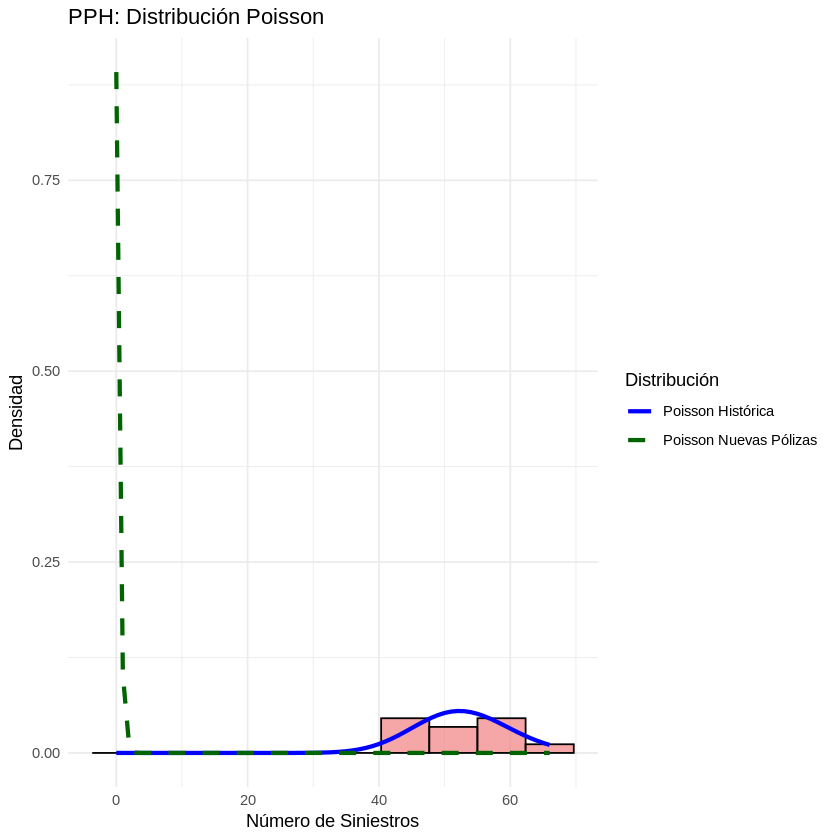

In [108]:
# Gráfico PPH - Solo Poisson (distribución recomendada)
max_val_pph <- max(pph$siniestros)
x_vals_pph <- 0:max_val_pph

# Distribuciones Poisson (histórica y nuevas pólizas)
poisson_hist_pph <- dpois(x_vals_pph, lambda = resultado_pph$ajustes$poisson$parametros$lambda)
poisson_nuevas_pph <- dpois(x_vals_pph, lambda = mu_nuevas_pph)

# Preparar datos para ggplot
df_hist_pph <- data.frame(
  x = x_vals_pph,
  Poisson_Historica = poisson_hist_pph,
  Poisson_Nuevas = poisson_nuevas_pph
)

# Gráfico
p_pph <- ggplot() +
  geom_histogram(data = data.frame(siniestros = pph$siniestros), 
                 aes(x = siniestros, y = ..density..), 
                 bins = 10, alpha = 0.7, fill = "lightcoral", color = "black") +
  geom_line(data = df_hist_pph, aes(x = x, y = Poisson_Historica, color = "Poisson Histórica"), size = 1.2) +
  geom_line(data = df_hist_pph, aes(x = x, y = Poisson_Nuevas, color = "Poisson Nuevas Pólizas"), size = 1.2, linetype = "dashed") +
  scale_color_manual(values = c("Poisson Histórica" = "blue", "Poisson Nuevas Pólizas" = "darkgreen")) +
  labs(title = "PPH: Distribución Poisson", 
       x = "Número de Siniestros", y = "Densidad", color = "Distribución") +
  theme_minimal()

print(p_pph)

### $N^{(pth)}$ - Binomial Negativa

In [109]:
# Cálculos para PTH (Binomial Negativa)
# Parámetros históricos del ajuste
size_hist_pth <- resultado_pth$ajustes$binomial_negativa$parametros$size
mu_hist_pth <- resultado_pth$ajustes$binomial_negativa$parametros$mu

# Para nuevas pólizas
mu_nuevas_pth <- l_pth * mean(vigentes_pth$polizas_activas)
size_nuevas_pth <- size_hist_pth  # El parámetro size se mantiene

# Parámetro de probabilidad para referencia
prob_pth <- size_nuevas_pth / (size_nuevas_pth + mu_nuevas_pth)

cat("Parámetros históricos - size:", size_hist_pth, ", mu:", mu_hist_pth, "\n")
cat("Parámetros nuevas pólizas - size:", size_nuevas_pth, ", mu:", mu_nuevas_pth, "\n")
cat("Probability parameter (p):", prob_pth, "\n")

Parámetros históricos - size: 70.55872 , mu: 48 
Parámetros nuevas pólizas - size: 70.55872 , mu: 0.1042296 
Probability parameter (p): 0.998525 


### Visualización PTH - Ajuste Histórico vs Nuevas Pólizas

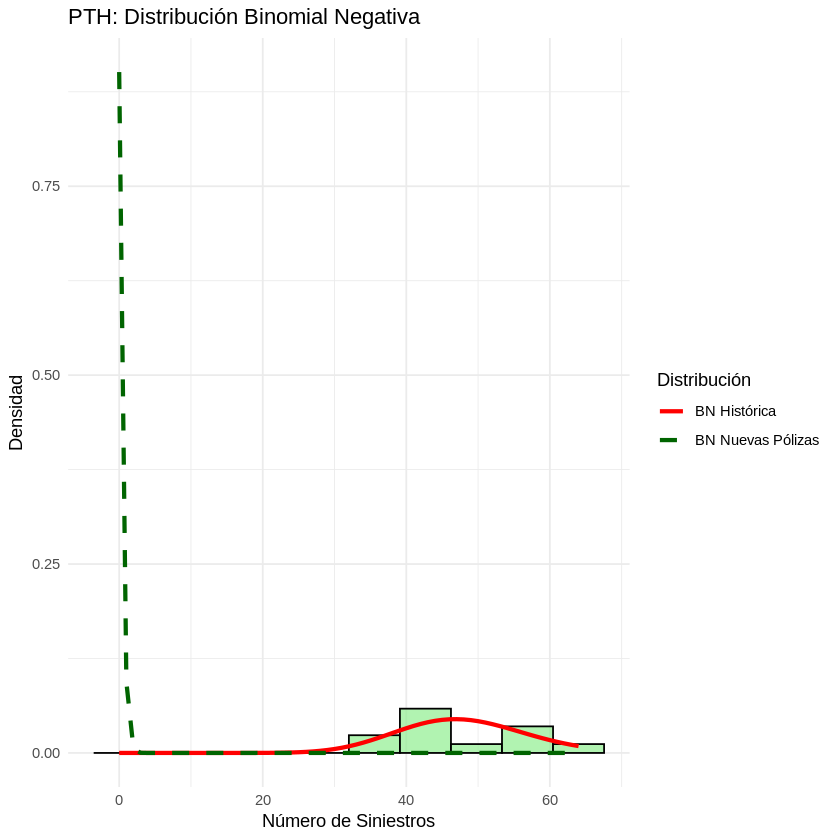

In [110]:
# Gráfico PTH - Solo Binomial Negativa (distribución recomendada)
max_val_pth <- max(pth$siniestros)
x_vals_pth <- 0:max_val_pth

# Distribuciones Binomial Negativa (histórica y nuevas pólizas)
nbinom_hist_pth <- dnbinom(x_vals_pth, size = size_hist_pth, mu = mu_hist_pth)
nbinom_nuevas_pth <- dnbinom(x_vals_pth, size = size_nuevas_pth, mu = mu_nuevas_pth)

# Preparar datos para ggplot
df_hist_pth <- data.frame(
  x = x_vals_pth,
  BN_Historica = nbinom_hist_pth,
  BN_Nuevas = nbinom_nuevas_pth
)

# Gráfico
p_pth <- ggplot() +
  geom_histogram(data = data.frame(siniestros = pth$siniestros), 
                 aes(x = siniestros, y = ..density..), 
                 bins = 10, alpha = 0.7, fill = "lightgreen", color = "black") +
  geom_line(data = df_hist_pth, aes(x = x, y = BN_Historica, color = "BN Histórica"), size = 1.2) +
  geom_line(data = df_hist_pth, aes(x = x, y = BN_Nuevas, color = "BN Nuevas Pólizas"), size = 1.2, linetype = "dashed") +
  scale_color_manual(values = c("BN Histórica" = "red", "BN Nuevas Pólizas" = "darkgreen")) +
  labs(title = "PTH: Distribución Binomial Negativa", 
       x = "Número de Siniestros", y = "Densidad", color = "Distribución") +
  theme_minimal()

print(p_pth)

### $N^{(rc)}$ - Binomial Negativa

In [111]:
# Cálculos para RC (Binomial Negativa)
# Parámetros históricos del ajuste
size_hist_rc <- resultado_rc$ajustes$binomial_negativa$parametros$size
mu_hist_rc <- resultado_rc$ajustes$binomial_negativa$parametros$mu

# Para nuevas pólizas
mu_nuevas_rc <- l_rc * mean(vigentes_rc$polizas_activas)
size_nuevas_rc <- size_hist_rc  # El parámetro size se mantiene

# Parámetro de probabilidad para referencia
prob_rc <- size_nuevas_rc / (size_nuevas_rc + mu_nuevas_rc)

cat("Parámetros históricos - size:", size_hist_rc, ", mu:", mu_hist_rc, "\n")
cat("Parámetros nuevas pólizas - size:", size_nuevas_rc, ", mu:", mu_nuevas_rc, "\n")
cat("Probability parameter (p):", prob_rc, "\n")

Parámetros históricos - size: 253.8759 , mu: 271.5833 
Parámetros nuevas pólizas - size: 253.8759 , mu: 0.53535 
Probability parameter (p): 0.9978957 


### Visualización RC - Ajuste Histórico vs Nuevas Pólizas

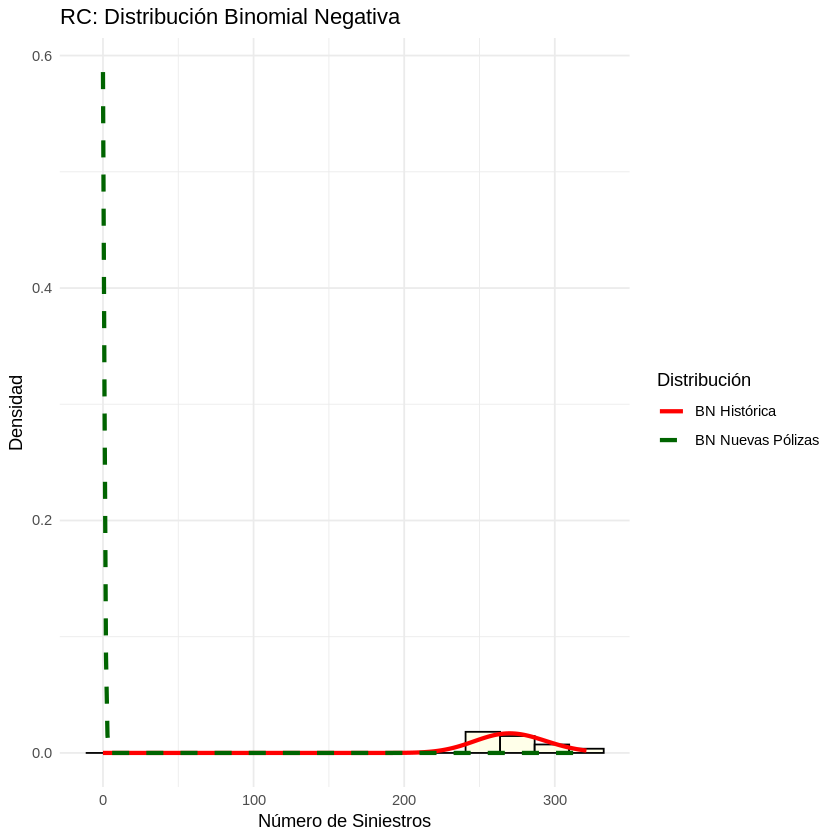

In [112]:
# Gráfico RC - Solo Binomial Negativa (distribución recomendada)
max_val_rc <- max(rc$siniestros)
x_vals_rc <- 0:max_val_rc

# Distribuciones Binomial Negativa (histórica y nuevas pólizas)
nbinom_hist_rc <- dnbinom(x_vals_rc, size = size_hist_rc, mu = mu_hist_rc)
nbinom_nuevas_rc <- dnbinom(x_vals_rc, size = size_nuevas_rc, mu = mu_nuevas_rc)

# Preparar datos para ggplot
df_hist_rc <- data.frame(
  x = x_vals_rc,
  BN_Historica = nbinom_hist_rc,
  BN_Nuevas = nbinom_nuevas_rc
)

# Gráfico
p_rc <- ggplot() +
  geom_histogram(data = data.frame(siniestros = rc$siniestros), 
                 aes(x = siniestros, y = ..density..), 
                 bins = 15, alpha = 0.7, fill = "lightyellow", color = "black") +
  geom_line(data = df_hist_rc, aes(x = x, y = BN_Historica, color = "BN Histórica"), size = 1.2) +
  geom_line(data = df_hist_rc, aes(x = x, y = BN_Nuevas, color = "BN Nuevas Pólizas"), size = 1.2, linetype = "dashed") +
  scale_color_manual(values = c("BN Histórica" = "red", "BN Nuevas Pólizas" = "darkgreen")) +
  labs(title = "RC: Distribución Binomial Negativa", 
       x = "Número de Siniestros", y = "Densidad", color = "Distribución") +
  theme_minimal()

print(p_rc)

## Resumen Visual de Distribuciones Finales para Nuevas Pólizas

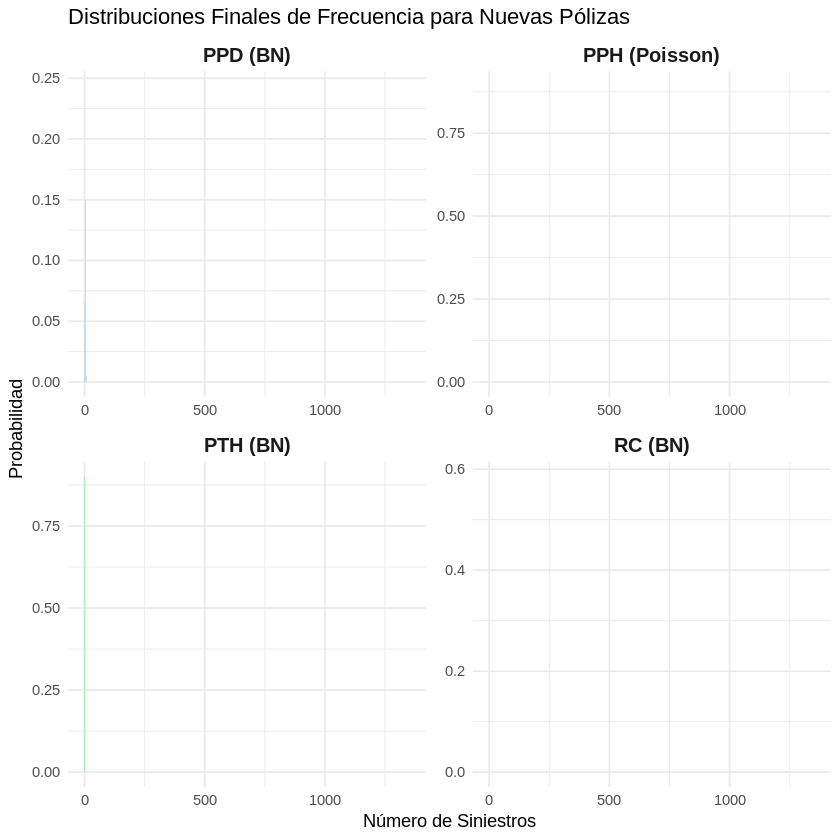

In [113]:
# Gráfico resumen: Distribuciones finales recomendadas para nuevas pólizas
max_general <- max(max_val, max_val_pph, max_val_pth, max_val_rc)
x_general <- 0:max_general

# Distribuciones finales recomendadas
df_final <- data.frame(
  x = rep(x_general, 4),
  Densidad = c(
    dnbinom(x_general, size = size_nuevas_ppd, mu = mu_nuevas_ppd),  # PPD: BN
    dpois(x_general, lambda = mu_nuevas_pph),                        # PPH: Poisson
    dnbinom(x_general, size = size_nuevas_pth, mu = mu_nuevas_pth),  # PTH: BN
    dnbinom(x_general, size = size_nuevas_rc, mu = mu_nuevas_rc)     # RC: BN
  ),
  Cobertura = rep(c("PPD (BN)", "PPH (Poisson)", "PTH (BN)", "RC (BN)"), each = length(x_general))
)

# Gráfico con facetas
p_final <- ggplot(df_final, aes(x = x, y = Densidad, fill = Cobertura)) +
  geom_col(alpha = 0.7, width = 0.8) +
  facet_wrap(~Cobertura, scales = "free", ncol = 2) +
  scale_fill_manual(values = c("PPD (BN)" = "lightblue", "PPH (Poisson)" = "lightcoral", 
                               "PTH (BN)" = "lightgreen", "RC (BN)" = "lightyellow")) +
  labs(title = "Distribuciones Finales de Frecuencia para Nuevas Pólizas",
       x = "Número de Siniestros", y = "Probabilidad") +
  theme_minimal() +
  theme(legend.position = "none",
        strip.text = element_text(size = 12, face = "bold"))

print(p_final)